<a href="https://colab.research.google.com/github/YaraMansour1985/prediction-of-Product-Sales/blob/main/Prediction_of_Product_sales(2nd_part).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [4]:
df=pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')
df.duplicated().sum()
df=df.drop_duplicates()


In [5]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')

In [6]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [7]:
#drop colum item identifier
df=df.drop(columns=['Item_Identifier'])

#preprocessing

In [8]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, ColumnTransformer

from sklearn import set_config
set_config(transform_output='pandas')

In [9]:
# Define features (X) and target (y).
# X should include every feature except: "Item_Outlet_Sales."
# y should be 'Item_Outlet_Sales'

target = 'Item_Outlet_Sales'
X = df.drop(columns=[target , 'Item_Outlet_Sales'])
y = df[target]

In [10]:
# Train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [11]:
# Checking object columns
X_train.select_dtypes('object')

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,Low Fat,Household,OUT018,Medium,Tier 3,Supermarket Type2
7510,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2
5828,Regular,Meat,OUT049,Medium,Tier 1,Supermarket Type1
5327,Low Fat,Baking Goods,OUT035,Small,Tier 2,Supermarket Type1
4810,Low Fat,Frozen Foods,OUT045,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...
5734,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
5191,Low Fat,Frozen Foods,OUT017,NaN,Tier 2,Supermarket Type1
5390,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1
860,Low Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1


In [12]:
# Prepare ordinal pipeline
ord_cols = ['Outlet_Size']

# Impute Most common
impute_common = SimpleImputer(strategy='most_frequent')

# Ordinal Encoder
Outlet_Size_order = ['Small','Medium','High']
ord_encoder = OrdinalEncoder(categories=[Outlet_Size_order])

# Scaler
scaler = StandardScaler()

# make a pipeline
ord_pipe = make_pipeline(impute_common, ord_encoder, scaler)
ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                ('standardscaler', StandardScaler())])

In [13]:
# Prepare Categorical pipeline
cat_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns

impute_missing = SimpleImputer(strategy='constant',fill_value='MISSING')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_pipe = make_pipeline(impute_missing, ohe_encoder)
ohe_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [14]:
# Prepare numeric piepline
num_cols = X_train.select_dtypes('number').columns

mean_imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

#Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [15]:
# Create the column transformer
preprocessor = ColumnTransformer([
    ('ord_pipe', ord_pipe, ord_cols),
    ('ohe_pipe', ohe_pipe, cat_cols),
    ('numeric_pipe', numeric_pipe, num_cols)
])

In [16]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('ord_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('ohe_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 (...
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')),
                                ('numeric_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object'))])

In [17]:
# Prepare numeric piepline
num_cols = X_train.select_dtypes('number').columns

mean_imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

#Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [18]:
# Create the column transformer
preprocessor = ColumnTransformer([
    ('ord_pipe', ord_pipe, ord_cols),
    ('ohe_pipe', ohe_pipe, cat_cols),
    ('numeric_pipe', numeric_pipe, num_cols)
])

In [19]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('ord_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('ohe_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 (...
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')),
                                ('numeric_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object'))])

In [20]:
# Transform the training and testing data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

display(X_train_processed.head())
display(X_test_processed.head())

,ord_pipe__Outlet_Size,ohe_pipe__Item_Fat_Content_Low Fat,ohe_pipe__Item_Fat_Content_Regular,ohe_pipe__Item_Type_Baking Goods,ohe_pipe__Item_Type_Breads,ohe_pipe__Item_Type_Breakfast,ohe_pipe__Item_Type_Canned,ohe_pipe__Item_Type_Dairy,ohe_pipe__Item_Type_Frozen Foods,ohe_pipe__Item_Type_Fruits and Vegetables,...,ohe_pipe__Outlet_Location_Type_Tier 2,ohe_pipe__Outlet_Location_Type_Tier 3,ohe_pipe__Outlet_Type_Grocery Store,ohe_pipe__Outlet_Type_Supermarket Type1,ohe_pipe__Outlet_Type_Supermarket Type2,ohe_pipe__Outlet_Type_Supermarket Type3,numeric_pipe__Item_Weight,numeric_pipe__Item_Visibility,numeric_pipe__Item_MRP,numeric_pipe__Outlet_Establishment_Year
4776,0.287374,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.817249,-0.712775,1.828109,1.327849
7510,0.287374,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.556340,-1.291052,0.603369,1.327849
5828,0.287374,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.131512,1.813319,0.244541,0.136187
5327,-1.384048,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,-1.169219,-1.004931,-0.952591,0.732018
4810,0.287374,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.528819,-0.965484,-0.336460,0.493686


,ord_pipe__Outlet_Size,ohe_pipe__Item_Fat_Content_Low Fat,ohe_pipe__Item_Fat_Content_Regular,ohe_pipe__Item_Type_Baking Goods,ohe_pipe__Item_Type_Breads,ohe_pipe__Item_Type_Breakfast,ohe_pipe__Item_Type_Canned,ohe_pipe__Item_Type_Dairy,ohe_pipe__Item_Type_Frozen Foods,ohe_pipe__Item_Type_Fruits and Vegetables,...,ohe_pipe__Outlet_Location_Type_Tier 2,ohe_pipe__Outlet_Location_Type_Tier 3,ohe_pipe__Outlet_Type_Grocery Store,ohe_pipe__Outlet_Type_Supermarket Type1,ohe_pipe__Outlet_Type_Supermarket Type2,ohe_pipe__Outlet_Type_Supermarket Type3,numeric_pipe__Item_Weight,numeric_pipe__Item_Visibility,numeric_pipe__Item_MRP,numeric_pipe__Outlet_Establishment_Year
7503,1.958796,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,3.310089e-01,-0.776646,-0.998816,-1.293807
2957,-1.384048,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-1.179892e+00,0.100317,-1.585194,-0.102145
7031,0.287374,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.784469e-01,-0.482994,-1.595784,0.136187
1084,0.287374,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,4.213344e-16,-0.415440,0.506592,-1.532139
856,-1.384048,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,-6.426567e-01,-1.047426,0.886725,0.732018


In [21]:
#save  the dataframe as csv
pd.DataFrame(X_train_processed).to_csv('X_train_processed.csv', index=False)
pd.DataFrame(X_test_processed).to_csv('X_test_processed.csv', index=False)


## Modeling
### Linear regression

In [34]:
#build a linear regression model
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

# Create a pipeline for the linear regression model
from sklearn.pipeline import make_pipeline
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)

# fit the model on data
lin_reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ord_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size']),
                                                 ('ohe_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_va...
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')),
                                                 ('numeric_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [23]:
#use the custom evaluation function to get the metrics of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse) # Calculate RMSE manually
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [24]:
# evaluate the model
evaluate_regression(lin_reg,X_train_processed,y_train,X_test_processed,y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.129
- MSE = 1,297,558.136
- RMSE = 1,139.104
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.120
- MSE = 1,194,349.715
- RMSE = 1,092.863
- R^2 = 0.567


In [25]:
#compare R^2 in both training and test data
#it is very close to each other with 0.005 difference which means its neither overfitted nor underfitted it is moderately fitted

###Random forest

In [26]:
# build a random forest model to predict sales
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [27]:
#evaluate the model
evaluate_regression(random_forest ,X_train_processed,y_train,X_test_processed,y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.476
- MSE = 182,669.600
- RMSE = 427.399
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 767.288
- MSE = 1,220,665.032
- RMSE = 1,104.837
- R^2 = 0.558


In [28]:
#compare R^2 in both training and test data
#the R^2 in training data is 0.38 larger than R^2 in test data which means that the model is overfitted

In [29]:
# compare the two models
#the linear regression mpodel is better in prediction tham the random forest model

###tuning random forest model

In [30]:
#use GridSearchCv to tune two hyperparameters in forest model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
Param_grid_rf= {
    'n_estimators': [50,100, 200], 'max_depth': [None, 5, 10]}
#instantiate gridearchcv and fit it on the training data
random_forest_tuned = RandomForestRegressor(random_state=42)
grid_rf= GridSearchCV(random_forest_tuned, param_grid=Param_grid_rf, cv=5, n_jobs=-1, verbose=1)
grid_rf.fit(X_train_processed, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [31]:
#fit the tuned forest on the training data and evaluate the model , set no folds
grid_rf.fit(X_train_processed, y_train)
evaluate_regression(grid_rf, X_train_processed, y_train, X_test_processed, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 755.047
- MSE = 1,152,172.825
- RMSE = 1,073.393
- R^2 = 0.611

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 729.251
- MSE = 1,100,811.483
- RMSE = 1,049.196
- R^2 = 0.601


In [32]:
#compare R^2 in both training and test data
#the R^2 in training data is 0.01 larger than R^2 in test data which means that the model is much better and fitted after tunning

#Evaluation

#overall
## Random forest model performance is higher than the linear regression model
1- R^2 (fitting)

model 1 (Linear Regression) R^2 for training is 0.562=(56%)
and for test is 0.567=(57%)
this means that this model explains only 56% of the variation in data
model 2 ( tuned forest model) R^2 for training is 0.611=(61%)
and for test is 0.601=(60%)
this means that it explains 60% of the variation in data

2- Errors(MAE)
the random forest model is off from the actual values by 729 units on average while the linear regression predictions are off from the actual values by 847  m this metric (MAE) is commonly used and easy to understand

3- so Random forest model is slightly more balanced overall  and has more stable performance on both training and test data



#Model Insights

##linear regression coeffecients

In [35]:
feature_names = lin_reg_pipe[0].get_feature_names_out()
feature_names

array(['ord_pipe__Outlet_Size', 'ohe_pipe__Item_Fat_Content_Low Fat',
       'ohe_pipe__Item_Fat_Content_Regular',
       'ohe_pipe__Item_Type_Baking Goods', 'ohe_pipe__Item_Type_Breads',
       'ohe_pipe__Item_Type_Breakfast', 'ohe_pipe__Item_Type_Canned',
       'ohe_pipe__Item_Type_Dairy', 'ohe_pipe__Item_Type_Frozen Foods',
       'ohe_pipe__Item_Type_Fruits and Vegetables',
       'ohe_pipe__Item_Type_Hard Drinks',
       'ohe_pipe__Item_Type_Health and Hygiene',
       'ohe_pipe__Item_Type_Household', 'ohe_pipe__Item_Type_Meat',
       'ohe_pipe__Item_Type_Others', 'ohe_pipe__Item_Type_Seafood',
       'ohe_pipe__Item_Type_Snack Foods',
       'ohe_pipe__Item_Type_Soft Drinks',
       'ohe_pipe__Item_Type_Starchy Foods',
       'ohe_pipe__Outlet_Identifier_OUT010',
       'ohe_pipe__Outlet_Identifier_OUT013',
       'ohe_pipe__Outlet_Identifier_OUT017',
       'ohe_pipe__Outlet_Identifier_OUT018',
       'ohe_pipe__Outlet_Identifier_OUT019',
       'ohe_pipe__Outlet_Identifier_OU

In [36]:
lin_reg_pipe[-1].coef_

array([   39.66092693,   -31.3126168 ,    31.3126168 ,   -18.61254054,
         -47.26085866,    26.74852315,     8.9036537 ,  -124.9475549 ,
         -20.38316674,    27.14148896,    -4.71764142,     8.41287319,
         -13.10279417,   -30.47742718,   -45.42626629,   308.88859562,
         -40.54493311,   -58.09827577,    23.47632414,  -609.60671094,
        -158.27224894,    62.51163583,    34.15183936,  -477.45444341,
         771.49052602,   150.75152795,  -127.64551247,   144.7018134 ,
         209.3715732 ,  -123.38105681,    85.6176513 ,    37.76340551,
       -1087.06115435,   281.41878897,    34.15183936,   771.49052602,
          -8.18675225,   -21.64647339,   984.51307395,   -81.58145753])

In [37]:
feature_names = lin_reg_pipe[0].get_feature_names_out()
coeffs = pd.Series(lin_reg_pipe[-1].coef_, index=feature_names)
coeffs

,0
ord_pipe__Outlet_Size,39.660927
ohe_pipe__Item_Fat_Content_Low Fat,-31.312617
ohe_pipe__Item_Fat_Content_Regular,31.312617
ohe_pipe__Item_Type_Baking Goods,-18.612541
ohe_pipe__Item_Type_Breads,-47.260859
ohe_pipe__Item_Type_Breakfast,26.748523
ohe_pipe__Item_Type_Canned,8.903654
ohe_pipe__Item_Type_Dairy,-124.947555
ohe_pipe__Item_Type_Frozen Foods,-20.383167
ohe_pipe__Item_Type_Fruits and Vegetables,27.141489


In [38]:
def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:

        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)

In [39]:
def plot_coeffs(coeffs, top_n=None, figsize=(4,5),
                intercept=False, intercept_name="intercept",
                annotate=False, ha='left', va='center', size=12,
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n == None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)

        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient',
            ylabel='Feature Names',
            title=title)
    ax.axvline(0, color='k')
    if annotate == True:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext, textcoords=textcoords)
    return ax



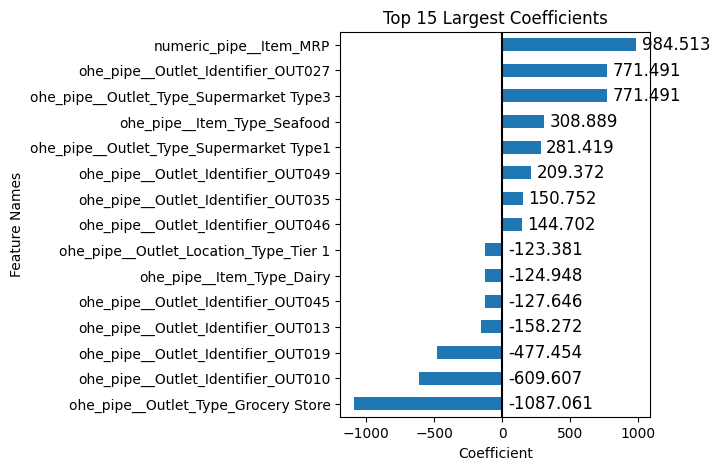

In [40]:
plot_coeffs(coeffs, top_n=15, annotate=True);

In [41]:
#identify the top 3 most important coefficients
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(3)
top_n_features

,0
ohe_pipe__Outlet_Type_Grocery Store,40.0
numeric_pipe__Item_MRP,39.0
ohe_pipe__Outlet_Identifier_OUT027,38.0


**Top 3 Most Important Features and Their Interpretations**

Based on the coefficient plot, the three most influential features in the model are Item_MRP, Outlet_Type_Supermarket Type3, and Outlet_Type_Grocery Store.
	1.	Item_MRP (Coefficient = +984.51)
This feature has the strongest positive impact on the predicted value. It indicates that as the product’s Maximum Retail Price (MRP) increases, the predicted sales or revenue also increase.
In simple terms: higher-priced items tend to generate higher sales predictions.
	2.	Outlet_Type_Supermarket Type3 (Coefficient = +771.89)
This feature also shows a strong positive influence. It means that items sold in large supermarkets (Type 3) are expected to have higher sales compared to other outlet types.
In simple terms: products in bigger, more modern supermarkets usually sell more.
	3.	Outlet_Type_Grocery Store (Coefficient = −1087.06)
This feature has a strong negative coefficient, meaning that being sold in a grocery store significantly decreases the predicted sales.
In simple terms: traditional grocery stores tend to have much lower sales compared to larger supermarkets.

## tree model importance

In [43]:
# build a random forest model to predict sales
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(random_state=42)

# Create a pipeline for the random forest model
from sklearn.pipeline import make_pipeline
rf_pipe = make_pipeline(preprocessor, random_forest)

# fit the model on data
rf_pipe.fit(X_train, y_train)

feature_names = rf_pipe[0].get_feature_names_out()
importances = pd.Series(rf_pipe[-1].feature_importances_, index= feature_names)

importances.sort_values(ascending=False)

,0
numeric_pipe__Item_MRP,0.441254
ohe_pipe__Outlet_Type_Grocery Store,0.191730
numeric_pipe__Item_Visibility,0.098881
numeric_pipe__Item_Weight,0.052614
ohe_pipe__Outlet_Type_Supermarket Type3,0.033837
ohe_pipe__Outlet_Identifier_OUT027,0.032251
numeric_pipe__Outlet_Establishment_Year,0.025240
ohe_pipe__Item_Type_Snack Foods,0.008242
ohe_pipe__Item_Type_Fruits and Vegetables,0.007878
ohe_pipe__Item_Type_Household,0.006695


In [46]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax





<Axes: title={'center': 'Top 10 Most Important Features'}, xlabel='Importance', ylabel='Feature Names'>

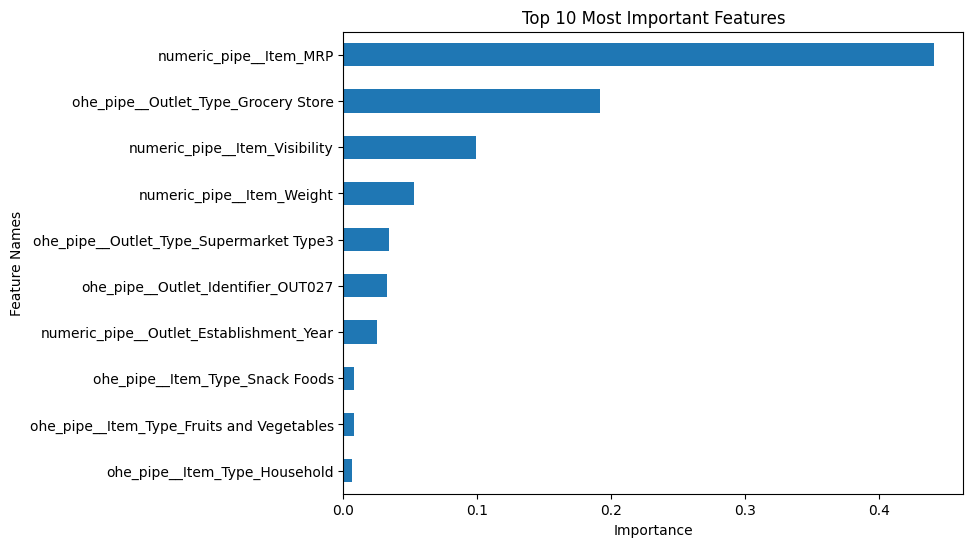

In [47]:
plot_importance(importances, top_n = 10)


In [49]:
#identify the top 5 most important coeffecients
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(5)
top_n_features

,0
ohe_pipe__Outlet_Type_Grocery Store,40.0
numeric_pipe__Item_MRP,39.0
ohe_pipe__Outlet_Identifier_OUT027,38.0
ohe_pipe__Outlet_Type_Supermarket Type3,37.0
ohe_pipe__Outlet_Identifier_OUT010,36.0


**Comparison Between Linear Regression and Random Forest Models**

Both the Linear Regression and Random Forest models were analyzed to identify the most influential features affecting sales predictions.

In the Linear Regression model, the top three features were:

	1.	Item_MRP – Higher product prices (MRP) were strongly associated with increased predicted sales.
	2.	Outlet_Type_Supermarket Type3 – Large supermarket outlets (Type 3) contributed positively to sales performance.
	3.	Outlet_Type_Grocery Store – Grocery stores had a strong negative impact, indicating lower expected sales.

In the Random Forest model, the top five features were:

	1.	Outlet_Type_Grocery Store
	2.	Item_MRP
	3.	Outlet_Identifier_OUT027
	4.	Outlet_Type_Supermarket Type3
	5.	Outlet_Identifier_OUT010

**Comparison and Interpretation:**

Both models identified Outlet_Type_Grocery Store, Item_MRP, and Outlet_Type_Supermarket Type3 as key predictors, showing consistency in feature importance across different algorithms. However, the Random Forest model provided deeper insights by also emphasizing specific outlet identifiers (OUT027 and OUT010), reflecting its ability to capture non-linear relationships and interactions between variables.

In contrast, the Linear Regression model focuses on linear associations and provides clear interpretability, but may not capture complex patterns as effectively as the Random Forest model.